In [21]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.1 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
投資組合報酬 -0.024522021628720192
投資組合平均每日報酬 -0.0007802376093527876
投資組合風險 0.012417465935960034


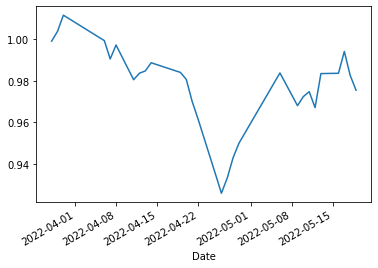

In [72]:
import numpy as np
import pandas as pd
import yfinance as yf
from pandas_datareader import data as wb

tickers = ['SPY','0050.TW','000001.SS','ISF.L']#投資標的
start = '2022-03-25'
end = '2022-03-31'

start1 = '2022-04-01'
end1 = '2022-04-30'

start2 = '2022-05-01'
end2 = '2022-05-20'

data_tickers = yf.download(tickers, start=start, end=end)['Adj Close'].dropna()
data_tickers1 = yf.download(tickers, start=start1, end=end1)['Adj Close'].dropna()
data_tickers2 = yf.download(tickers, start=start2, end=end2)['Adj Close'].dropna()

simpleret = data_tickers.pct_change().dropna()
simpleret1 = data_tickers1.pct_change().dropna()
simpleret2 = data_tickers2.pct_change().dropna()

proportion = [0.25,0.25,0.25,0.25]
proportion1 = [0.4,0.15,0.3,0.15]
proportion2 = [0.35,0.15,0.25,0.25]
wights=np.array(proportion)/sum(proportion)
wights1=np.array(proportion1)/sum(proportion1)
wights2=np.array(proportion2)/sum(proportion2)

portfolio_ret_cumsum = ((( simpleret + 1 ).cumprod().dropna()-1)*wights).sum(axis=1)+1
portfolio_ret_cumsum.name='portfolio'
portfolio_ret_cumsum1 = ((( simpleret1 + 1 ).cumprod().dropna()-1)*wights1).sum(axis=1)+1
portfolio_ret_cumsum1.name='portfolio'
portfolio_ret_cumsum2 = ((( simpleret2 + 1 ).cumprod().dropna()-1)*wights2).sum(axis=1)+1
portfolio_ret_cumsum2.name='portfolio'
market = pd.concat([portfolio_ret_cumsum, portfolio_ret_cumsum1, portfolio_ret_cumsum2])
market.plot()
#計算投資組合的基本回測資訊
final_ret=market[-1]-1
mean_ret=market.pct_change().mean()
std_ret=market.pct_change().std()
print('投資組合報酬',final_ret)
print('投資組合平均每日報酬',mean_ret)
print('投資組合風險',std_ret)

[*********************100%***********************]  60 of 60 completed
[*********************100%***********************]  61 of 61 completed
[*********************100%***********************]  68 of 68 completed
[*********************100%***********************]  63 of 63 completed
投資組合報酬 -0.027101660490258417
投資組合平均每日報酬 -0.0009809426444770332
投資組合風險 0.022013972278907428


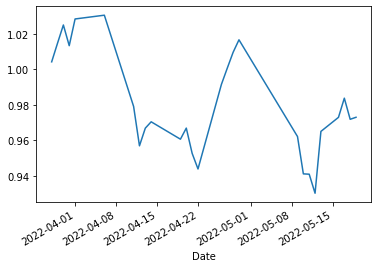

In [73]:
import numpy as np
import pandas as pd
import yfinance as yf
data = pd.read_excel("3.25.xlsx")
t1 = data.iloc[:-1,0:2].dropna()
t1["a"] = t1["weights"] * 0.25
t2 = data.iloc[:-1,2:4].dropna()
t2 = t2.rename(columns={"美": "台", "weights.1": "weights"})
t2["a"] = t2["weights"] * 0.25
t3 = data.iloc[:-1,4:6].dropna()
t3 = t3.rename(columns={"中": "台", "weights.2": "weights"})
t3["a"] = t3["weights"] * 0.25
t4 = data.iloc[:-1,6:8].dropna()
t4 = t4.rename(columns={"英": "台", "weights.3": "weights"})
t4["a"] = t4["weights"] * 0.25


data1 = pd.read_excel("4.8.xlsx")
t11 = data1.iloc[:-1,0:2].dropna()
t11["a"] = t11["weights"] * 0.15
t22 = data1.iloc[:-1,2:4].dropna()
t22 = t22.rename(columns={"美": "台", "weights.1": "weights"})
t22["a"] = t22["weights"] * 0.4
t33 = data1.iloc[:-1,4:6].dropna()
t33 = t33.rename(columns={"中": "台", "weights.2": "weights"})
t33["a"] = t33["weights"] * 0.3
t44 = data1.iloc[:-1,6:8].dropna()
t44 = t44.rename(columns={"英": "台", "weights.3": "weights"})
t44["a"] = t44["weights"] * 0.15


data2 = pd.read_excel("4.22.xlsx")
t111 = data2.iloc[:-1,0:2].dropna()
t111["a"] = t111["weights"] * 0.15
t222 = data2.iloc[:-1,2:4].dropna()
t222 = t222.rename(columns={"美": "台", "weights.1": "weights"})
t222["a"] = t222["weights"] * 0.4
t333 = data2.iloc[:-1,4:6].dropna()
t333 = t333.rename(columns={"中": "台", "weights.2": "weights"})
t333["a"] = t333["weights"] * 0.3
t444 = data2.iloc[:-1,6:8].dropna()
t444 = t444.rename(columns={"英": "台", "weights.3": "weights"})
t444["a"] = t444["weights"] * 0.15

data3 = pd.read_excel("5.6.xlsx")
t1111 = data3.iloc[:-1,0:2].dropna()
t1111["a"] = t1111["weights"] * 0.15
t2222 = data3.iloc[:-1,2:4].dropna()
t2222 = t2222.rename(columns={"美": "台", "weights.1": "weights"})
t2222["a"] = t2222["weights"] * 0.35
t3333 = data3.iloc[:-1,4:6].dropna()
t3333 = t3333.rename(columns={"中": "台", "weights.2": "weights"})
t3333["a"] = t3333["weights"] * 0.25
t4444 = data3.iloc[:-1,6:8].dropna()
t4444 = t4444.rename(columns={"英": "台", "weights.3": "weights"})
t4444["a"] = t4444["weights"] * 0.25


all1 = pd.concat([t1, t2, t3, t4], ignore_index=True)
all2 = pd.concat([t11, t22, t33, t44], ignore_index=True)
all3 = pd.concat([t111, t222, t333, t444], ignore_index=True)
all4 = pd.concat([t1111, t2222, t3333, t4444], ignore_index=True)


tickers1 = list(all1['台'])
tickers2 = list(all2['台'])
tickers3 = list(all3['台'])
tickers4 = list(all4['台'])

start1 = '2022-03-25'   
end1 = '2022-04-07'
start2 = '2022-04-08'   
end2 = '2022-04-24'
start3 = '2022-04-25'   
end3 = '2022-05-05'
start4 = '2022-05-06'   
end4 = '2022-05-20'
 
data_tickers1 = yf.download(tickers1, start=start1, end=end1)['Adj Close'].dropna()
data_tickers2 = yf.download(tickers2, start=start2, end=end2)['Adj Close'].dropna()
data_tickers3 = yf.download(tickers3, start=start3, end=end3)['Adj Close'].dropna()
data_tickers4 = yf.download(tickers4, start=start4, end=end4)['Adj Close'].dropna()

simpleret1 = data_tickers1.pct_change().dropna()
simpleret2 = data_tickers2.pct_change().dropna()
simpleret3 = data_tickers3.pct_change().dropna()
simpleret4 = data_tickers4.pct_change().dropna()

proportion1 = list(all1["a"])
proportion2 = list(all2["a"])
proportion3 = list(all3["a"])
proportion4 = list(all4["a"])

wights1=np.array(proportion1)/sum(proportion1)
wights2=np.array(proportion2)/sum(proportion2)
wights3=np.array(proportion3)/sum(proportion3)
wights4=np.array(proportion4)/sum(proportion4)

portfolio_ret_cumsum1 = ((( simpleret1 + 1 ).cumprod().dropna()-1)*wights1).sum(axis=1)+1
portfolio_ret_cumsum2 = ((( simpleret2 + 1 ).cumprod().dropna()-1)*wights2).sum(axis=1)+1
portfolio_ret_cumsum3 = ((( simpleret3 + 1 ).cumprod().dropna()-1)*wights3).sum(axis=1)+1
portfolio_ret_cumsum4 = ((( simpleret4 + 1 ).cumprod().dropna()-1)*wights4).sum(axis=1)+1

without_mv = pd.concat([portfolio_ret_cumsum1, portfolio_ret_cumsum2, portfolio_ret_cumsum3, portfolio_ret_cumsum4])
without_mv.plot()
final_ret=without_mv[-1]-1
mean_ret=without_mv.pct_change().mean()
std_ret=without_mv.pct_change().std()
print('投資組合報酬',final_ret)
print('投資組合平均每日報酬',mean_ret)
print('投資組合風險',std_ret)

[*********************100%***********************]  60 of 60 completed
[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  33 of 33 completed
[*********************100%***********************]  29 of 29 completed
投資組合報酬 0.03515897539171675
投資組合平均每日報酬 0.0015998653165444012
投資組合風險 0.029314763598365656


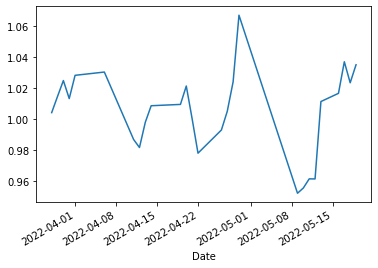

In [74]:
data = pd.read_excel("3.25.xlsx")
t1 = data.iloc[:-1,0:2].dropna()
t1["a"] = t1["weights"] * 0.25
t2 = data.iloc[:-1,2:4].dropna()
t2 = t2.rename(columns={"美": "台", "weights.1": "weights"})
t2["a"] = t2["weights"] * 0.25
t3 = data.iloc[:-1,4:6].dropna()
t3 = t3.rename(columns={"中": "台", "weights.2": "weights"})
t3["a"] = t3["weights"] * 0.25
t4 = data.iloc[:-1,6:8].dropna()
t4 = t4.rename(columns={"英": "台", "weights.3": "weights"})
t4["a"] = t4["weights"] * 0.25


data1 = pd.read_excel("4.8a.xlsx")
t11 = data1.iloc[:-1,0:2].dropna()
t11["a"] = t11["weights"] * 0.15
t22 = data1.iloc[:-1,2:4].dropna()
t22 = t22.rename(columns={"美": "台", "weights.1": "weights"})
t22["a"] = t22["weights"] * 0.4
t33 = data1.iloc[:-1,4:6].dropna()
t33 = t33.rename(columns={"中": "台", "weights.2": "weights"})
t33["a"] = t33["weights"] * 0.3
t44 = data1.iloc[:-1,6:8].dropna()
t44 = t44.rename(columns={"英": "台", "weights.3": "weights"})
t44["a"] = t44["weights"] * 0.15


data2 = pd.read_excel("4.22a.xlsx")
t111 = data2.iloc[:-1,0:2].dropna()
t111["a"] = t111["weights"] * 0.15
t222 = data2.iloc[:-1,2:4].dropna()
t222 = t222.rename(columns={"美": "台", "weights.1": "weights"})
t222["a"] = t222["weights"] * 0.4
t333 = data2.iloc[:-1,4:6].dropna()
t333 = t333.rename(columns={"中": "台", "weights.2": "weights"})
t333["a"] = t333["weights"] * 0.3
t444 = data2.iloc[:-1,6:8].dropna()
t444 = t444.rename(columns={"英": "台", "weights.3": "weights"})
t444["a"] = t444["weights"] * 0.15

data3 = pd.read_excel("5.6a.xlsx")
t1111 = data3.iloc[:-1,0:2].dropna()
t1111["a"] = t1111["weights"] * 0.15
t2222 = data3.iloc[:-1,2:4].dropna()
t2222 = t2222.rename(columns={"美": "台", "weights.1": "weights"})
t2222["a"] = t2222["weights"] * 0.35
t3333 = data3.iloc[:-1,4:6].dropna()
t3333 = t3333.rename(columns={"中": "台", "weights.2": "weights"})
t3333["a"] = t3333["weights"] * 0.25
t4444 = data3.iloc[:-1,6:8].dropna()
t4444 = t4444.rename(columns={"英": "台", "weights.3": "weights"})
t4444["a"] = t4444["weights"] * 0.25


all1 = pd.concat([t1, t2, t3, t4], ignore_index=True)
all2 = pd.concat([t11, t22, t33, t44], ignore_index=True)
all3 = pd.concat([t111, t222, t333, t444], ignore_index=True)
all4 = pd.concat([t1111, t2222, t3333, t4444], ignore_index=True)


tickers1 = list(all1['台'])
tickers2 = list(all2['台'])
tickers3 = list(all3['台'])
tickers4 = list(all4['台'])

start1 = '2022-03-25'   
end1 = '2022-04-07'
start2 = '2022-04-08'   
end2 = '2022-04-24'
start3 = '2022-04-25'   
end3 = '2022-05-05'
start4 = '2022-05-06'   
end4 = '2022-05-20'
 
data_tickers1 = yf.download(tickers1, start=start1, end=end1)['Adj Close'].dropna()
data_tickers2 = yf.download(tickers2, start=start2, end=end2)['Adj Close'].dropna()
data_tickers3 = yf.download(tickers3, start=start3, end=end3)['Adj Close'].dropna()
data_tickers4 = yf.download(tickers4, start=start4, end=end4)['Adj Close'].dropna()

simpleret1 = data_tickers1.pct_change().dropna()
simpleret2 = data_tickers2.pct_change().dropna()
simpleret3 = data_tickers3.pct_change().dropna()
simpleret4 = data_tickers4.pct_change().dropna()

proportion1 = list(all1["a"])
proportion2 = list(all2["a"])
proportion3 = list(all3["a"])
proportion4 = list(all4["a"])

wights1=np.array(proportion1)/sum(proportion1)
wights2=np.array(proportion2)/sum(proportion2)
wights3=np.array(proportion3)/sum(proportion3)
wights4=np.array(proportion4)/sum(proportion4)

portfolio_ret_cumsum1 = ((( simpleret1 + 1 ).cumprod().dropna()-1)*wights1).sum(axis=1)+1
portfolio_ret_cumsum2 = ((( simpleret2 + 1 ).cumprod().dropna()-1)*wights2).sum(axis=1)+1
portfolio_ret_cumsum3 = ((( simpleret3 + 1 ).cumprod().dropna()-1)*wights3).sum(axis=1)+1
portfolio_ret_cumsum4 = ((( simpleret4 + 1 ).cumprod().dropna()-1)*wights4).sum(axis=1)+1

with_mv = pd.concat([portfolio_ret_cumsum1, portfolio_ret_cumsum2, portfolio_ret_cumsum3, portfolio_ret_cumsum4])
with_mv.plot()
final_ret=with_mv[-1]-1
mean_ret=with_mv.pct_change().mean()
std_ret=with_mv.pct_change().std()
print('投資組合報酬',final_ret)
print('投資組合平均每日報酬',mean_ret)
print('投資組合風險',std_ret)

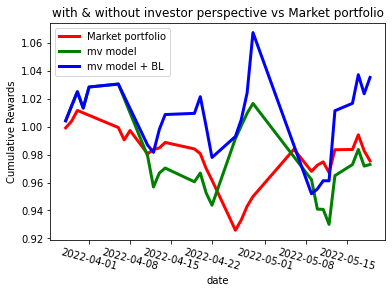

In [75]:

import matplotlib.pyplot as plt
plt.plot(market,label='Market portfolio',color='r',linestyle='-',linewidth=3)
plt.plot(without_mv,label='mv model',color='g',linestyle='-',linewidth=3)
plt.plot(with_mv,label='mv model + BL',color='b',linestyle='-',linewidth=3)
plt.legend(loc=2)
#plt.figure(figsize=(20,10))
plt.title('with & without investor perspective vs Market portfolio')
plt.xlabel('date')
plt.xticks(rotation=-15)
plt.ylabel('Cumulative Rewards')
plt.show()